<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/02_reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np

# ML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

## Metodo PCA de sklearn:

Antes de continuar lee a detalle la documentacion del metodo de PCA de sklearn que utilizaremos por los siguientes 1000 annos:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

# Intuincion Geometrica de PCA

# PCA para Reduccion de Dimensionalidad

## Visualizacion I: Que es PCA?
Observemos como se comporta el PCA cuando hay una relacion lineal entre 2 variables explicada por un proceso compartido por ambas.

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x1 y x2? (Nota el signo "+ ,-" de los coeficientes que relacionan a (x1 , x2) con c1)
3. Porque es tan grande la varianza explicada del primer componente?




Explained Variance:  [0.97779157]
Sum of Explained Variance:  0.9777915714597009
Principal Components [[ 0.32379223 -0.94612821]]


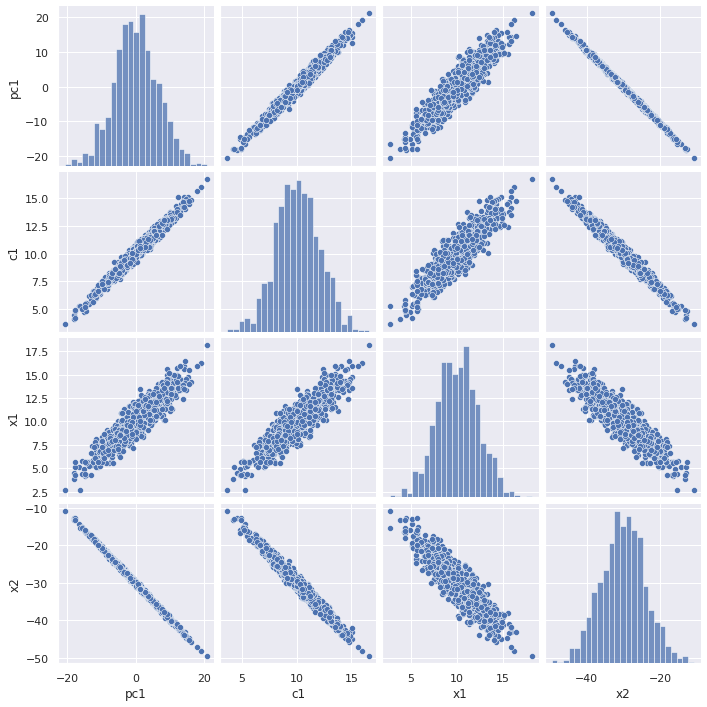

In [27]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)

# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components',  pca.components_)
sns.pairplot(finalDf)

### Respuesta a Preguntas importantes:
1. Como se relaciona c1 con pc1?

2. Como se relaciona pc1 con x1 y x2? (Nota el signo "+ ,-" de los coeficientes que relacionan a (x1 , x2) con c1)

3. Porque es tan grande la varianza explicada del primer componente?




## Visualizacion II: Un extranno llega!
Ahora observemos que pasa si agregamos una tercera varible que no esta relacionada, es decir que no comparte un proceso con las otras variables.  
x1 y x2 comparten un proceso lineal, pero la nueva varaible x3 no!

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x3?
3. Que paso con la varianza explicada por pc1 respecto a la visualizacion anterior?
4. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por x3?




Explained Variance:  [0.9555074]
Sum of Explained Variance:  0.9555074011749376
Principal Components [[ 0.32378742 -0.94610869  0.00632876]]


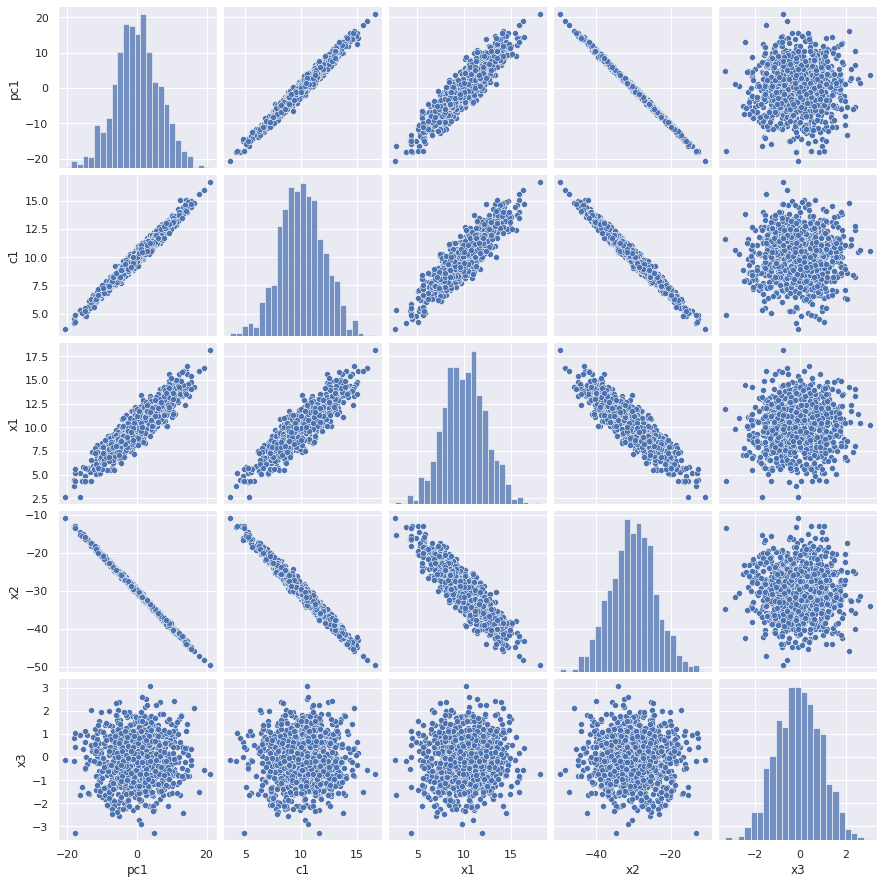

In [28]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components', pca.components_)
sns.pairplot(finalDf)

### Respuesta Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x3?
3. Que paso con la varianza explicada por pc1 respecto a la visualizacion anterior?
4. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por x3?




## Visualizacion III: Alguien mas extranno llega!
Ahora aumentemos la magnitud de la variable x3

### Preguntas importantes:
1. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por la mayor varianza que presenta x3?




Explained Variance:  [0.70106079]
Sum of Explained Variance:  0.7010607898182198


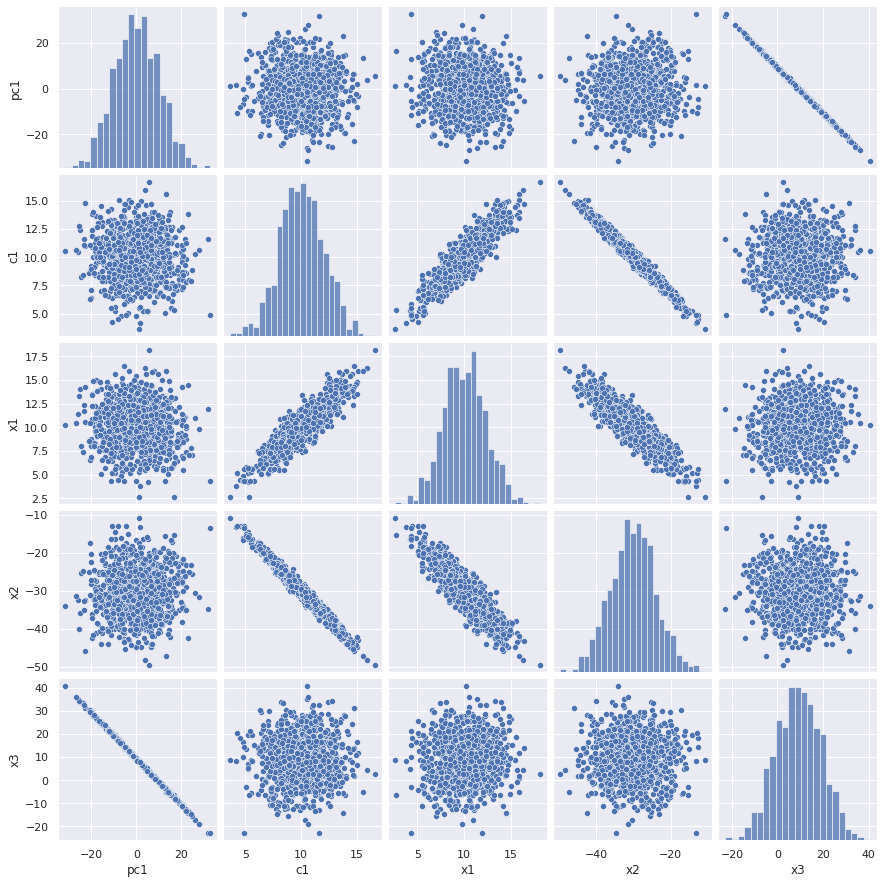

In [29]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Respuesta Preguntas importantes:
1. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por la mayor varianza que presenta x3?




## Visualizacion III.2: Los extrannos son bienvenidos!
Aumentemos el numero de componentes principales a 2

### Preguntas importantes:
1. Como se relaciona pc1 con x1, x2 & x3?
2. Como se relaciona pc2 con x1, x2 & x3?
3. Existe un orden entre las columnas y los componentes?
(Nota con que columnas/variable se relaciona pc1 y pc2)?
4. Agregar un segundo componente fue buena idea? (observa la varianza total explicada)





Explained Variance:  [0.70106079 0.2922833 ]
Sum of Explained Variance:  0.9933440938140239


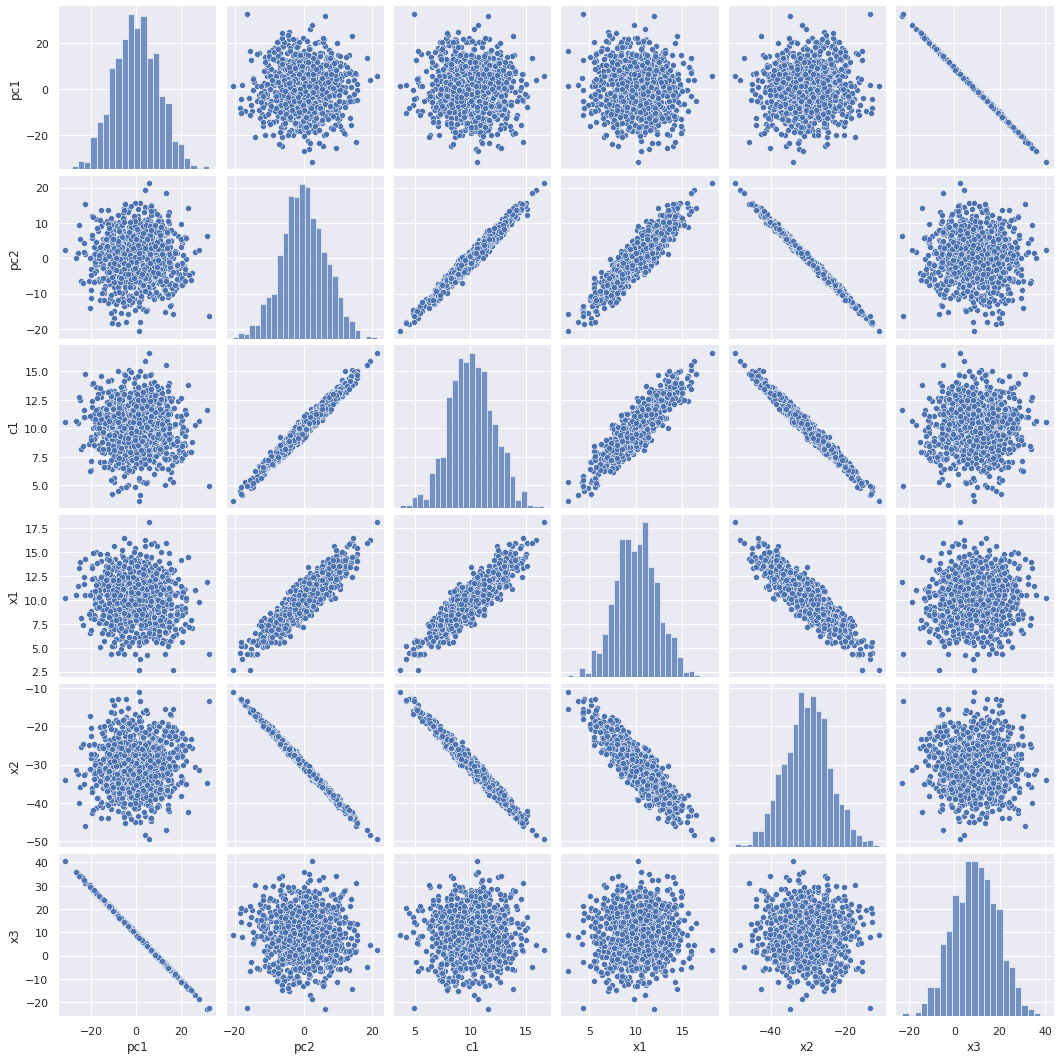

In [30]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Respuesta a Preguntas importantes:
1. Como se relaciona pc1 con x1, x2 & x3?
2. Como se relaciona pc2 con x1, x2 & x3?
3. Existe un orden entre las columnas y los componentes?
(Nota con que columnas/variable se relaciona pc1 y pc2)?
4. Agregar un segundo componente fue buena idea? (observa la varianza total explicada)





## Creemos una funcion para PCA


In [31]:
def pca_fun(x=pd.DataFrame(),n_c=1):
  # Define Method
  pca = PCA(n_components=n_c)
  principalComponents = pca.fit_transform(x)

  # Create names for pc
  pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]

  # Compute PC
  principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)

  # Create visualizations
  finalDf = pd.concat([principalDf, x], axis = 1)
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
  print('Principal Componeents', pca.components_)
  sns.pairplot(finalDf)


## Visualizacion IV: Correlaciones!
Veamos que pasa con el PCA cuando las variablestienen un proceso lineal que relaciona expresado como correlacion.

Matriz de Correlacion
          x1        x2
x1  1.000000  0.901158
x2  0.901158  1.000000 

Explained Variance:  [0.95058071]
Sum of Explained Variance:  0.9505807063283276
Principal Componeents [[0.70927433 0.70493257]]


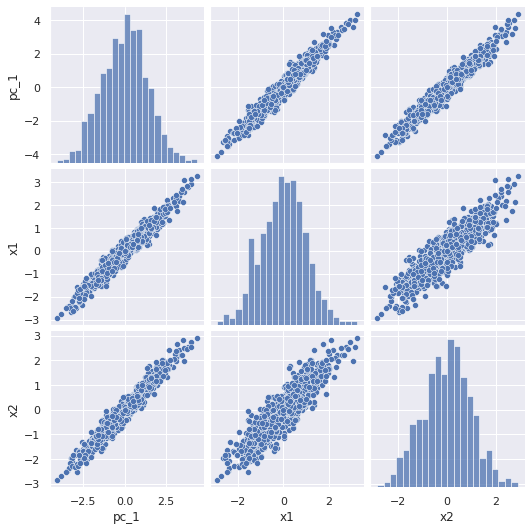

In [32]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[1, .9], 
                [.9, 1]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=1)

## Visualizacion IV.2: No...Correlaciones!

Veamos que pasa con el PCA cuando las variables no tienen un proceso lineal que las relaciona.


### Preguntas importantes:
1. El PCA nos sirve para reducir la dimensionalidad de varibles correlacionadas? (Piensa en los escenarios posibles)


Matriz de Correlacion
          x1        x2
x1  1.000000  0.012764
x2  0.012764  1.000000 

Explained Variance:  [0.50706364]
Sum of Explained Variance:  0.507063638902168
Principal Componeents [[-0.84518716 -0.53447045]]


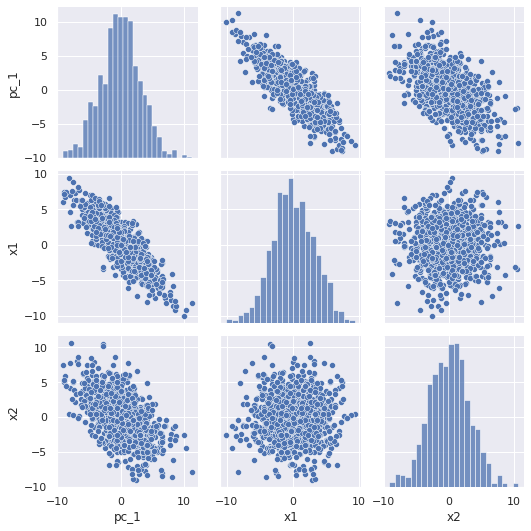

In [33]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[10, 0], 
                [0, 10]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=1)

### Respuesta a Preguntas importantes:
1. El PCA nos sirve para reducir la dimensionalidad de varibles correlacionadas? (Piensa en los escenarios posibles)


# PCA y Centrar

## Creemos una funcion para generar datos correlacionados


In [34]:
def cor_data(mu=[0,0,0], sigma=np.eye(3), n=1000, seed=7463):
  np.random.seed(seed)
  x_names = ["x{}".format(a+1) for a in range(len(mu))]
  x = np.random.multivariate_normal(mu, sigma, n)
  x = pd.DataFrame(x, columns=x_names)
  print('Matriz de Correlacion')
  print(x.corr(), '\n')
  return x


## Visualizacion de PCA y Normalizacion

## Agreguemos normalizacion a nuestra funcion de PCA

### Articulo sobre normalizacion:
Si deseas conocer mas sobre los metodos de normalizacion o escalamiento te recomendamos leer el siguiente articulo: 

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Para teoricos:
https://www.researchgate.net/publication/255644479_On_Relationships_Between_Uncentred_And_Column-Centred_Principal_Component_Analysis

### Preguntas Importantes:
1. Que paso con la varianza explicada por los componentes cuando normalizamos los datos? (Hint: Piensa en la varianza de cada variable)

2. Deberiamos de normalizar/escalar/estandarizar antes de aplicar PCA?

In [35]:
# Importemos el metodo de normalizacion
from sklearn.preprocessing import StandardScaler

def pca_fun(x=pd.DataFrame(), n_c=1, nor=False):
  # Define Method
  pca = PCA(n_components=n_c)

  # Standarize
  if nor:
    x_cols= x.columns
    std_scale = StandardScaler().fit(x)
    x = pd.DataFrame(std_scale.transform(x), columns=x_cols)

  principalComponents = pca.fit_transform(x)

  # Create names for pc
  pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]

  # Compute PC
  principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)

  # Create visualizations
  finalDf = pd.concat([principalDf, x], axis = 1)
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

  sns.pairplot(finalDf)


Matriz de Correlacion
          x1        x2        x3
x1  1.000000  0.953782 -0.000802
x2  0.953782  1.000000  0.008499
x3 -0.000802  0.008499  1.000000 

Without normalization
Explained Variance:  [0.95374094 0.02403691]
Sum of Explained Variance:  0.9777778473153145
 
 
 With Normalization
Explained Variance:  [0.65127103 0.3333381 ]
Sum of Explained Variance:  0.9846091300069255


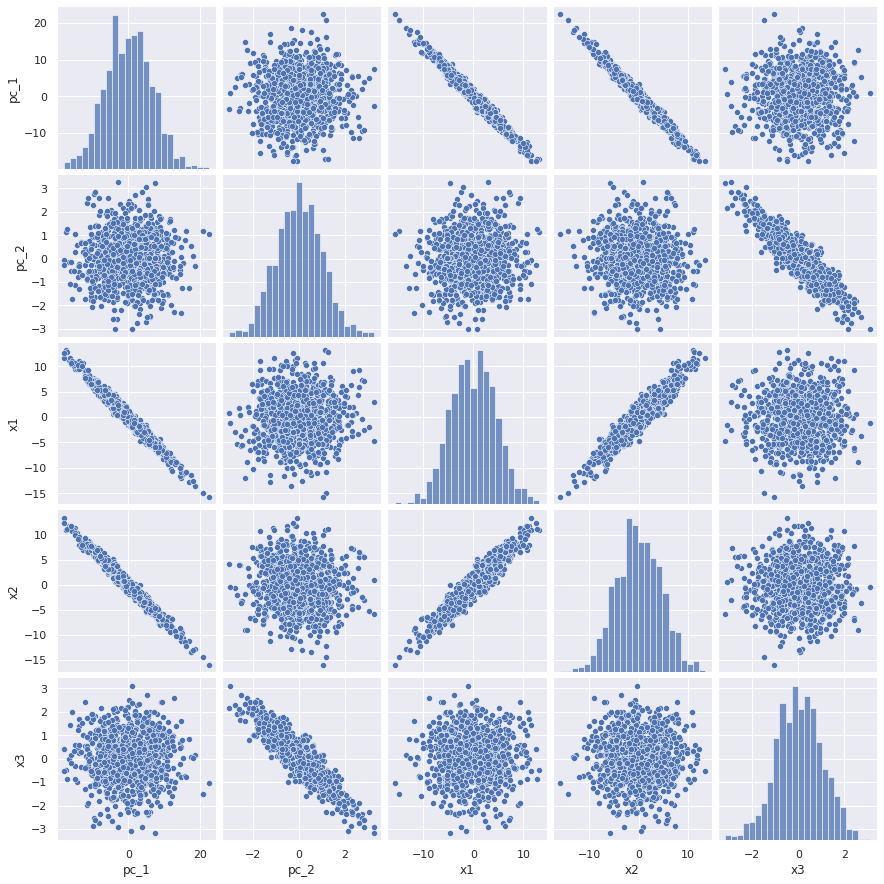

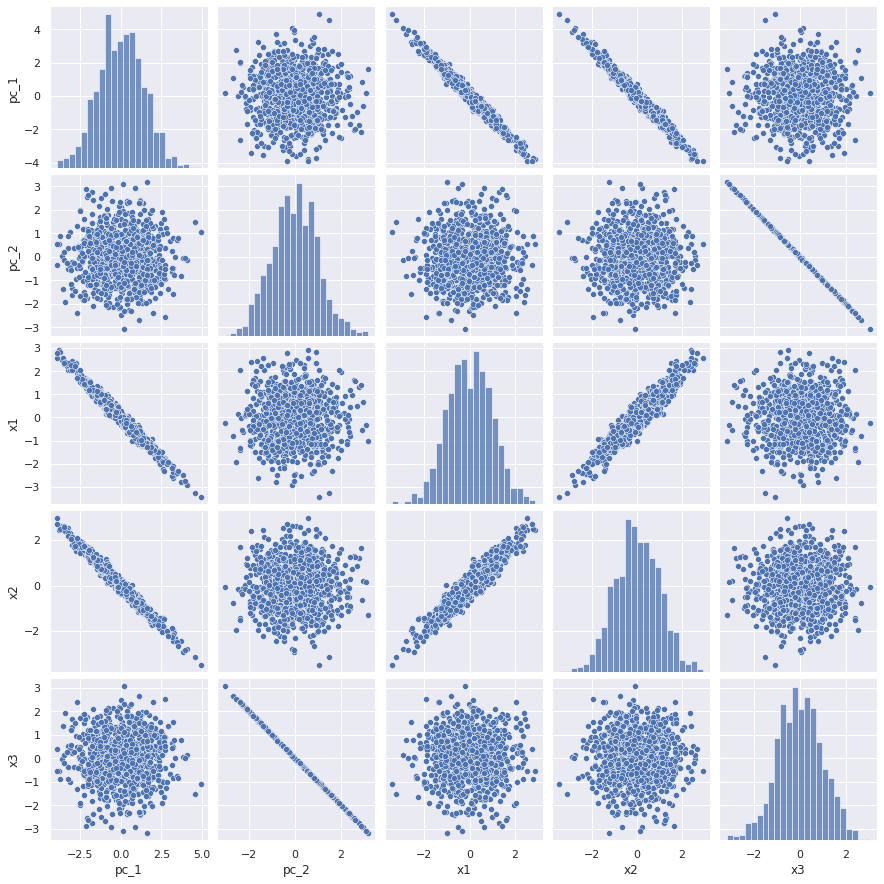

In [36]:
# Same as last cell
mean = [0, 0, 0]
cov = np.array([[20, 19, 0], 
                [19, 20, 0],
                [0, 0 , 1]]
      )
x = cor_data(mu = mean, sigma=cov)

print('Without normalization')
pca_fun(x=x, n_c=2)

print(' \n \n With Normalization')
pca_fun(x=x, n_c=2, nor=True)

In [37]:
x

,x1,x2,x3
0,-3.200341,-0.852326,-0.657194
1,-0.954818,-0.379129,0.833323
2,-0.931582,-1.911625,-1.367012
3,4.379534,4.393696,0.136742
4,8.510017,8.428423,-0.394667
...,...,...,...
995,-5.901381,-4.628137,0.786739
996,-1.699901,-2.670110,0.297952
997,-1.093748,-1.192228,-0.643047
998,7.648952,9.398398,-1.275798


### Respuesta a Preguntas Importantes:
1. Que paso con la varianza explicada por los componentes cuando normalizamos los datos? (Hint: Piensa en la varianza de cada variable)

2. Deberiamos de normalizar/escalar/estandarizar antes de aplicar PCA?

# PCA y Prediccion
